# Car Price Prediction -

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

### 1. Know your data -

In [2]:
#loading the data
df=pd.read_csv('car_price_prediction.csv')

In [3]:
#shape of the data
df.shape

(19237, 18)

In [4]:
#how does the data look like
df.sample(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
4002,45749217,18817,-,KIA,RIO,2016,Hatchback,No,Petrol,1.4,91000 km,4.0,Manual,Front,04-May,Left wheel,Silver,6
11156,44131728,19444,-,MERCEDES-BENZ,Sprinter 316,2005,Microbus,No,Diesel,2.7 Turbo,25600 km,4.0,Tiptronic,Rear,04-May,Left wheel,Silver,4
11456,45776709,20385,562,BUICK,Encore,2015,Jeep,Yes,Petrol,1.4,58000 km,4.0,Automatic,Front,04-May,Left wheel,White,10
12321,43813860,53314,-,TOYOTA,Prius,2017,Sedan,Yes,Plug-in Hybrid,1.8,32000 km,4.0,Variator,Front,04-May,Left wheel,White,8
8014,45726977,16621,-,TOYOTA,Prius,2010,Hatchback,Yes,Petrol,1.8,164000 km,4.0,Automatic,Front,04-May,Left wheel,Red,10
9678,45771449,40142,1811,LEXUS,GX 470,2010,Jeep,Yes,Petrol,4.6,357246 km,8.0,Automatic,4x4,04-May,Left wheel,Grey,0
11664,45455218,16621,639,FORD,Focus se,2014,Hatchback,No,Petrol,2,130326 km,4.0,Automatic,Front,04-May,Left wheel,Grey,6
4967,45810122,12570,761,CHEVROLET,Lacetti,2010,Sedan,Yes,Petrol,1.8,112720 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
10158,45778228,13485,-,AUDI,A6,2008,Sedan,Yes,Petrol,3.2,268800 km,6.0,Tiptronic,4x4,04-May,Left wheel,Silver,8
5313,45749301,7840,-,HONDA,Elysion 3.0,2004,Minivan,No,Petrol,3,219000 km,6.0,Automatic,Front,04-May,Right-hand drive,Black,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

We can see here the features - Manufacturer, Model, Category,Leather interior,Fuel type,Cylinders,Gear box type,Wheel,Color,Airbags are categorical but given as object type.

In [6]:
#To convert dtype object to category
df['Manufacturer']=df['Manufacturer'].astype('category')
df['Model']=df['Model'].astype('category')
df['Category']=df['Category'].astype('category')
df['Leather interior']=df['Leather interior'].astype('category')
df['Fuel type']=df['Fuel type'].astype('category')
df['Gear box type']=df['Gear box type'].astype('category')
df['Wheel']=df['Wheel'].astype('category')
df['Color']=df['Color'].astype('category')

In [7]:
#check the dtypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                19237 non-null  int64   
 1   Price             19237 non-null  int64   
 2   Levy              19237 non-null  object  
 3   Manufacturer      19237 non-null  category
 4   Model             19237 non-null  category
 5   Prod. year        19237 non-null  int64   
 6   Category          19237 non-null  category
 7   Leather interior  19237 non-null  category
 8   Fuel type         19237 non-null  category
 9   Engine volume     19237 non-null  object  
 10  Mileage           19237 non-null  object  
 11  Cylinders         19237 non-null  float64 
 12  Gear box type     19237 non-null  category
 13  Drive wheels      19237 non-null  object  
 14  Doors             19237 non-null  object  
 15  Wheel             19237 non-null  category
 16  Color             1923

we can see there are no missing value in data, but when we look at the data. There are missing values as '-' in Levy column.

In [8]:
df['Levy'].value_counts()['-']

5819

In [9]:
#Missing values are as '-' in Levy column
print('Missing values in the dataset:\n')
for each_column in df.columns:
    print('Column: {} - {}'.format(each_column, list(df[each_column]).count('-')))

Missing values in the dataset:

Column: ID - 0
Column: Price - 0
Column: Levy - 5819
Column: Manufacturer - 0
Column: Model - 0
Column: Prod. year - 0
Column: Category - 0
Column: Leather interior - 0
Column: Fuel type - 0
Column: Engine volume - 0
Column: Mileage - 0
Column: Cylinders - 0
Column: Gear box type - 0
Column: Drive wheels - 0
Column: Doors - 0
Column: Wheel - 0
Column: Color - 0
Column: Airbags - 0


There are total 5819 values that are empty or given as '-'.

In [10]:
#converting '-' values into nan values
df['Levy']=[np.nan if value== '-' else float(value) for value in df['Levy']]

In [11]:
#total 5819 nan values in Levy column which we can fill in data preprocessing step.
df['Levy'].isnull().sum()

5819

In [12]:
df.isnull().sum()

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

## 2. Univariate Feature Analysis - 
### 2.1. Categorical Features-

### 2.1.1 Category -

In [13]:
category_count=df['Category'].value_counts()
category_count

Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: Category, dtype: int64

Text(0.5, 0, 'Category')

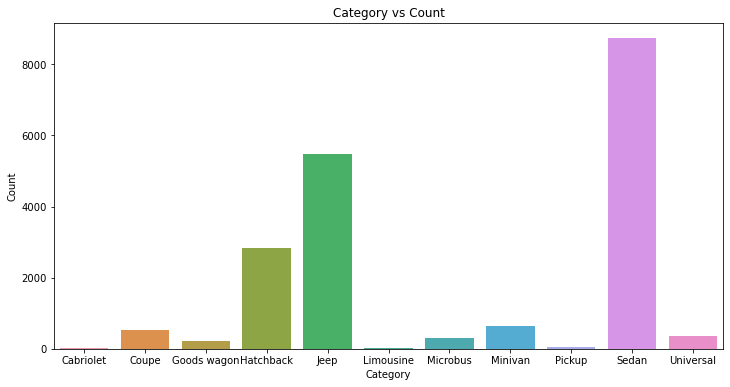

In [14]:
#Barplot of category vs count
plt.figure(figsize=(12,6))
sns.barplot(category_count.index,category_count.values)
plt.title('Category vs Count',fontsize=12)
plt.ylabel('Count')
plt.xlabel('Category')

Here we can observe that some of the categories has very less data to describe (i.e Cabriolet, Coupe,..etc)

In [15]:
#calculating the mean price for each category-
mean_category=df[['Category','Price']].groupby('Category',as_index=False).mean()
mean_category

,Category,Price
0,Cabriolet,24583.694444
1,Coupe,21250.406015
2,Goods wagon,122916.180258
3,Hatchback,11381.245873
4,Jeep,23684.285949
5,Limousine,11534.454545
6,Microbus,18550.928105
7,Minivan,20531.221020
8,Pickup,28805.269231
9,Sedan,14231.545902


Text(0, 0.5, 'mean Price')

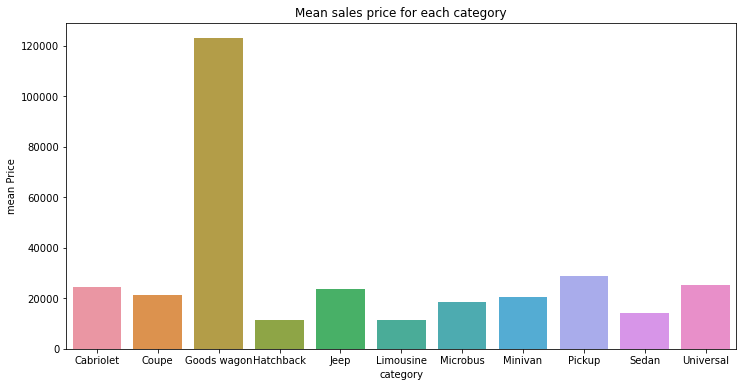

In [16]:
#barplot of the mean price vs categories
plt.figure(figsize=(12,6))
sns.barplot(mean_category['Category'],mean_category['Price'])
plt.title('Mean sales price for each category')
plt.xlabel('category')
plt.ylabel('mean Price')

### 2.1.2 Leather Interior -

In [17]:
#value count for the cars having Leather interior
leather_count=df['Leather interior'].value_counts()
leather_count

Yes    13954
No      5283
Name: Leather interior, dtype: int64

Text(0, 0.5, 'Count')

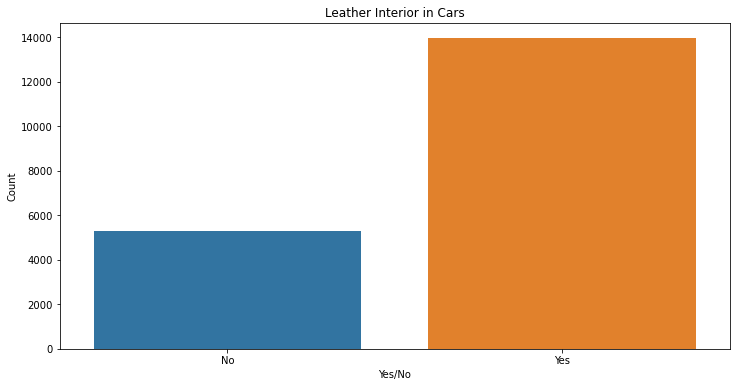

In [18]:
#plotting the leather interior cars vs the count
plt.figure(figsize=(12,6))
sns.barplot(leather_count.index,leather_count.values)
plt.title('Leather Interior in Cars')
plt.xlabel('Yes/No')
plt.ylabel('Count')


In [19]:
#calculating the mean price for cars having the leather interior
mean_leather_int=df[['Leather interior','Price']].groupby('Leather interior',as_index=False).mean()
mean_leather_int

,Leather interior,Price
0,No,18322.323301
1,Yes,18644.369930


Text(0, 0.5, 'Mean Price')

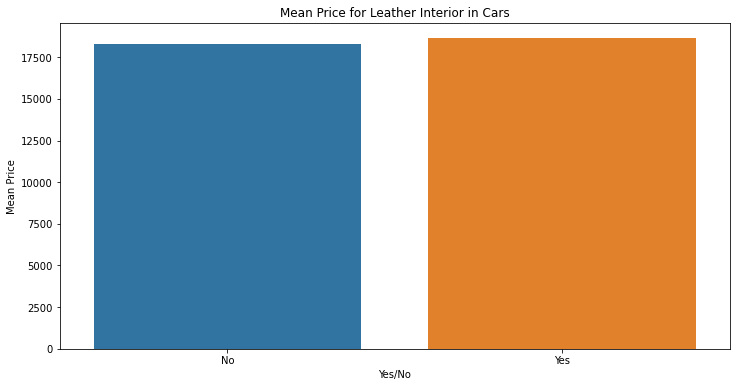

In [20]:
#plotting the mean price 
plt.figure(figsize=(12,6))
sns.barplot(mean_leather_int['Leather interior'],mean_leather_int['Price'])
plt.title('Mean Price for Leather Interior in Cars')
plt.xlabel('Yes/No')
plt.ylabel('Mean Price')

### 2.1.3 Fuel Type-

In [21]:
#analysing the fuel type 
fuel_count=df['Fuel type'].value_counts()
fuel_count

Petrol            10150
Diesel             4036
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Hydrogen              1
Name: Fuel type, dtype: int64

Text(0, 0.5, 'Count')

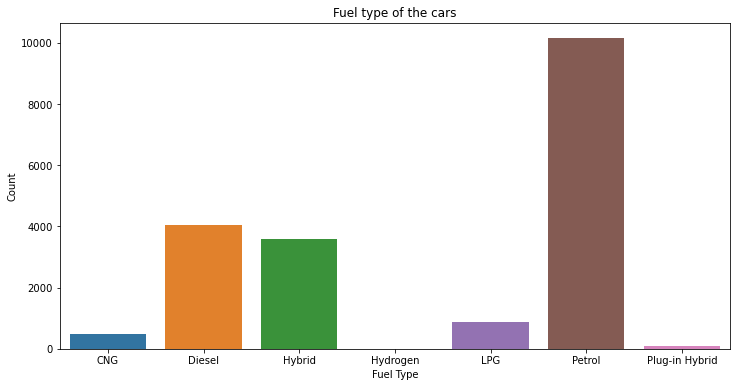

In [22]:
#plotting the barplot
plt.figure(figsize=(12,6))
sns.barplot(fuel_count.index,fuel_count.values)
plt.title('Fuel type of the cars')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

In [23]:
#calculating the mean price as per the fuel type of cars
mean_fuel_type=df[['Fuel type','Price']].groupby('Fuel type',as_index=False).mean()
mean_fuel_type

,Fuel type,Price
0,CNG,8509.591093
1,Diesel,30631.071358
2,Hybrid,10849.320570
3,Hydrogen,20385.000000
4,LPG,13309.438341
5,Petrol,17377.351527
6,Plug-in Hybrid,23700.453488


Text(0, 0.5, 'Mean Price')

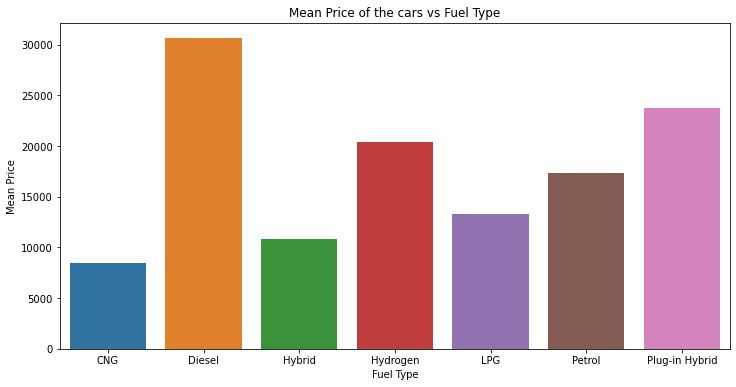

In [24]:
#plotting the mean barplot -
plt.figure(figsize=(12,6))
sns.barplot(mean_fuel_type['Fuel type'],mean_fuel_type['Price'])
plt.title('Mean Price of the cars vs Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mean Price')

### 2.1.4 Gear Box Type -

In [25]:
gear_count=df['Gear box type'].value_counts()
gear_count

Automatic    13514
Tiptronic     3102
Manual        1875
Variator       746
Name: Gear box type, dtype: int64

Text(0, 0.5, 'Count')

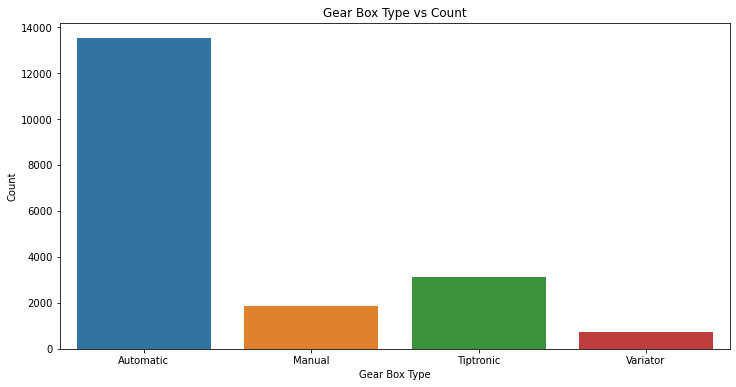

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(gear_count.index,gear_count.values)
plt.title('Gear Box Type vs Count')
plt.xlabel('Gear Box Type')
plt.ylabel('Count')

In [27]:
#mean price for each of the gearbox type
mean_gear_box=df[['Gear box type','Price']].groupby('Gear box type',as_index=False).mean()
mean_gear_box

,Gear box type,Price
0,Automatic,15974.326032
1,Manual,25614.896533
2,Tiptronic,26448.307221
3,Variator,14762.399464


Text(0, 0.5, 'Mean Price')

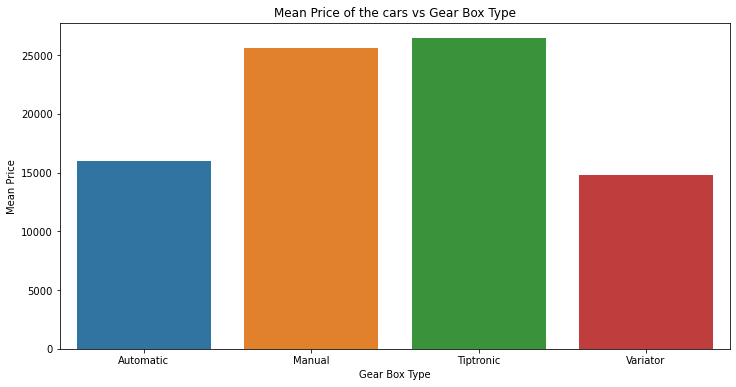

In [28]:
#plotting the mean barplot -
plt.figure(figsize=(12,6))
sns.barplot(mean_gear_box['Gear box type'],mean_gear_box['Price'])
plt.title('Mean Price of the cars vs Gear Box Type')
plt.xlabel('Gear Box Type')
plt.ylabel('Mean Price')

### 2.1.5 Drive Wheel - 

In [29]:
#Drive wheel type count
drive_count=df['Drive wheels'].value_counts()
drive_count

Front    12874
4x4       4058
Rear      2305
Name: Drive wheels, dtype: int64

Text(0, 0.5, 'Mean Price')

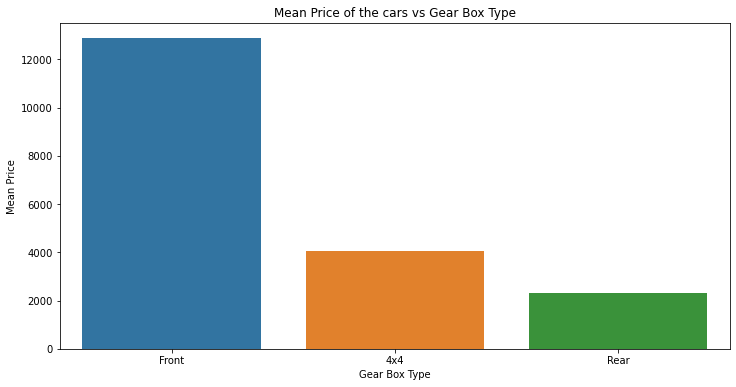

In [30]:
#plotting the mean barplot -
plt.figure(figsize=(12,6))
sns.barplot(drive_count.index,drive_count.values)
plt.title('Mean Price of the cars vs Gear Box Type')
plt.xlabel('Gear Box Type')
plt.ylabel('Mean Price')

In [31]:
# Mean price of the cars for driving wheels
mean_price_drive=df[['Drive wheels','Price']].groupby('Drive wheels',as_index=False).mean()
mean_price_drive

,Drive wheels,Price
0,4x4,19535.423854
1,Front,18491.339055
2,Rear,17192.244252


Text(0, 0.5, 'Mean Price')

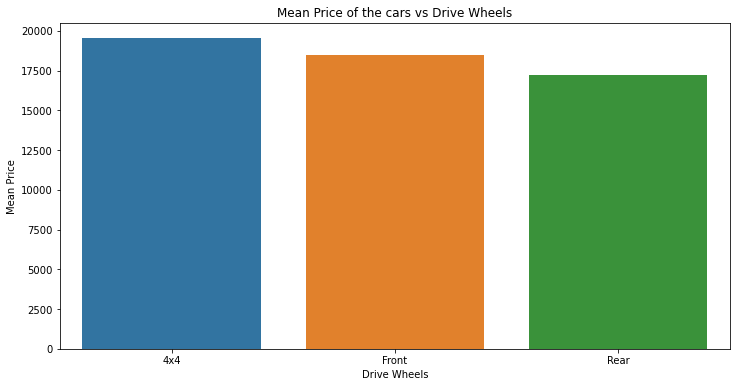

In [32]:
#plotting the mean barplot -
plt.figure(figsize=(12,6))
sns.barplot(mean_price_drive['Drive wheels'],mean_price_drive['Price'])
plt.title('Mean Price of the cars vs Drive Wheels')
plt.xlabel('Drive Wheels')
plt.ylabel('Mean Price')

### 2.1.6 Doors -

In [33]:
#doors count
doors_count=df['Doors'].value_counts()
doors_count

04-May    18332
02-Mar      777
>5          128
Name: Doors, dtype: int64

Text(0, 0.5, 'Count')

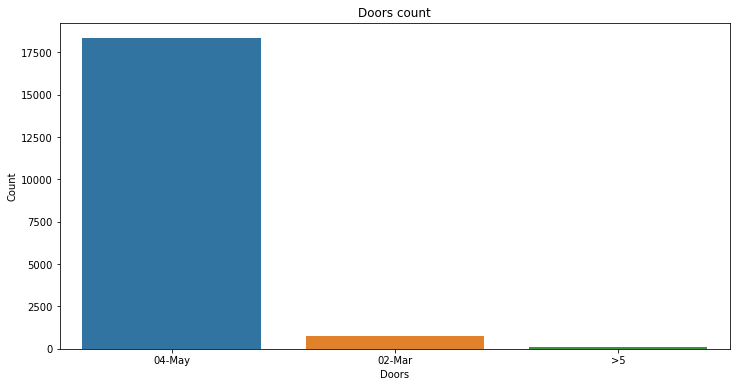

In [34]:
#plotting the mean barplot -
plt.figure(figsize=(12,6))
sns.barplot(doors_count.index,doors_count.values)
plt.title('Doors count')
plt.xlabel('Doors')
plt.ylabel('Count') 

In [35]:
#mean price as per no of doors
mean_price_doors=df[['Doors','Price']].groupby('Doors',as_index=False).mean()
mean_price_doors

,Doors,Price
0,02-Mar,50379.595882
1,04-May,17180.945778
2,>5,22299.437500


Text(0, 0.5, 'Mean Price')

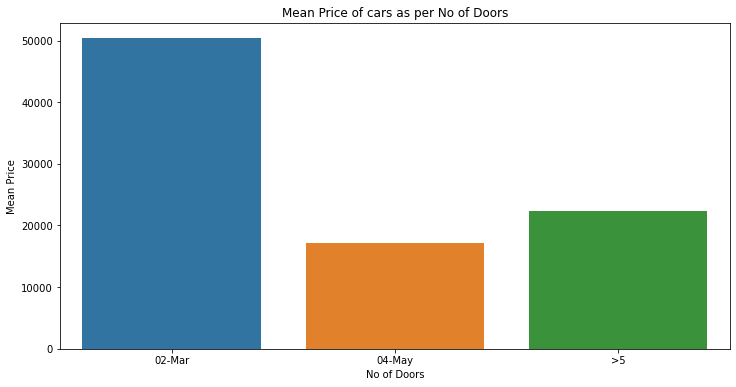

In [36]:
#plotting the mean barplot -
plt.figure(figsize=(12,6))
sns.barplot(mean_price_doors['Doors'],mean_price_doors['Price'])
plt.title('Mean Price of cars as per No of Doors')
plt.xlabel('No of Doors')
plt.ylabel('Mean Price') 

### 2.1.7 Wheel -

In [37]:
#driving wheel side car count
wheel_count=df['Wheel'].value_counts()
wheel_count

Left wheel          17753
Right-hand drive     1484
Name: Wheel, dtype: int64

In [38]:
mean_price_wheel=df[['Wheel','Price']].groupby('Wheel',as_index=False).mean()
mean_price_wheel

,Wheel,Price
0,Left wheel,19363.071425
1,Right-hand drive,8900.111186


Text(0, 0.5, 'Count')

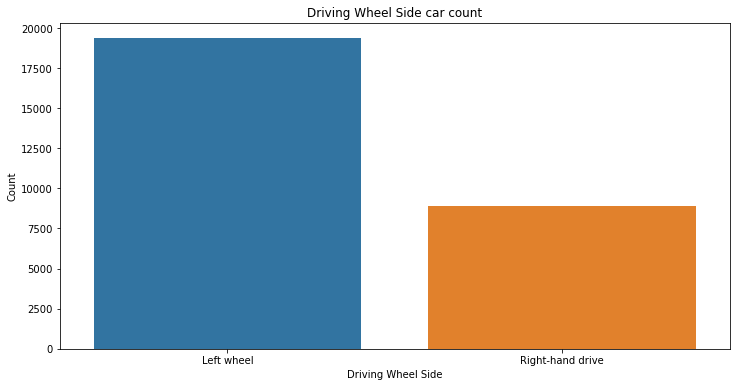

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(mean_price_wheel['Wheel'],mean_price_wheel['Price'])
plt.title('Driving Wheel Side car count')
plt.xlabel('Driving Wheel Side')
plt.ylabel('Count') 

### 2.1.8 Color-

In [40]:
#color wise car count
color_count=df['Color'].value_counts()
color_count

Black            5033
White            4489
Silver           3792
Grey             2375
Blue             1396
Red               639
Green             322
Orange            253
Brown             187
Carnelian red     179
Golden            145
Beige             134
Sky blue          122
Yellow            106
Purple             39
Pink               26
Name: Color, dtype: int64

Text(0, 0.5, 'Count')

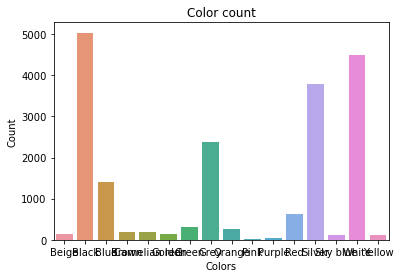

In [41]:

#plotting the barplotplt.figure(figsize=(18,6))
sns.barplot(color_count.index,color_count.values)
plt.title('Color count')
plt.xlabel('Colors')
plt.ylabel("Count")

In [42]:
#mean price of the car as per color
mean_price_color=df[['Color','Price']].groupby('Color',as_index=False).mean()
mean_price_color

,Color,Price
0,Beige,15627.559701
1,Black,18886.917346
2,Blue,33726.850287
3,Brown,19709.636364
4,Carnelian red,15820.927374
5,Golden,14678.551724
6,Green,9449.677019
7,Grey,19203.448000
8,Orange,13008.422925
9,Pink,10649.076923


Text(0, 0.5, 'Mean Price')

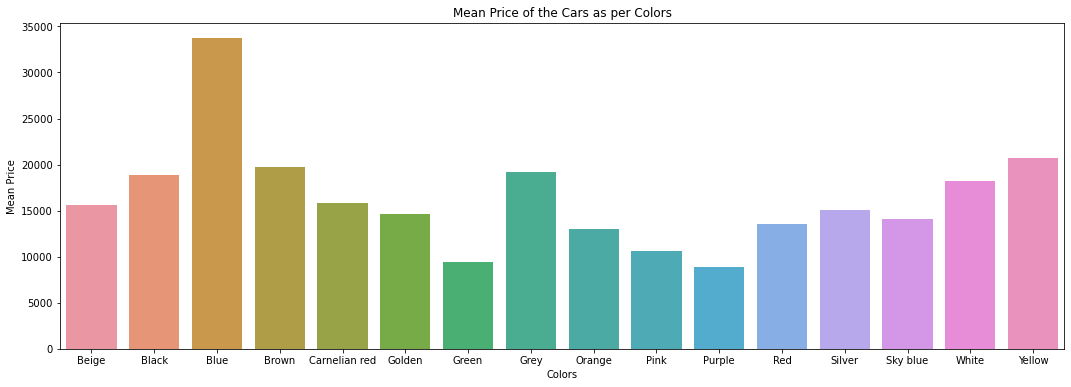

In [43]:
#bar plot
plt.figure(figsize=(18,6))
sns.barplot(mean_price_color['Color'],mean_price_color['Price'])
plt.title('Mean Price of the Cars as per Colors')
plt.xlabel('Colors')
plt.ylabel('Mean Price')

### 2.1.9 Cylinder

In [44]:
#Number of cylinder wise car count
cylinder_count=df['Cylinders'].value_counts()
cylinder_count

4.0     14367
6.0      3462
8.0       991
5.0       169
3.0       107
2.0        42
1.0        38
12.0       38
10.0       12
16.0        5
7.0         4
9.0         1
14.0        1
Name: Cylinders, dtype: int64

In [45]:
#mean price of the car for number of cylinders
mean_price_cylinder=df[['Cylinders','Price']].groupby('Cylinders',as_index=False).mean()
mean_price_cylinder

,Cylinders,Price
0,1.0,16375.105263
1,2.0,10358.404762
2,3.0,9879.093458
3,4.0,18436.320874
4,5.0,14640.213018
5,6.0,16618.038417
6,7.0,6446.500000
7,8.0,28198.847629
8,9.0,2800.000000
9,10.0,31486.666667


## 2.2 Numerical Features -

### 2.2.1 Price

Text(0.5, 1.0, 'Distribution of the Price')

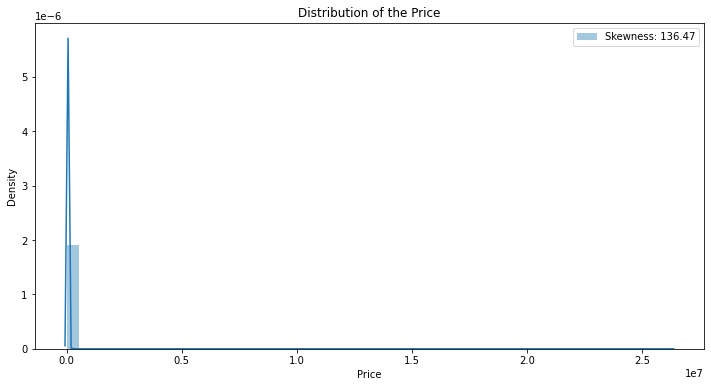

In [46]:
#Distplot to check the distribution of the target column 
plt.figure(figsize=(12,6))
sns.distplot(df['Price'],label = 'Skewness: %.2f'%(df['Price'].skew())) #skeweness of the data
plt.legend(loc = 'best') 
plt.title('Distribution of the Price')

Here we can observe that, the data is highly skewed towards the left

Text(0.5, 1.0, 'Outlier Detection')

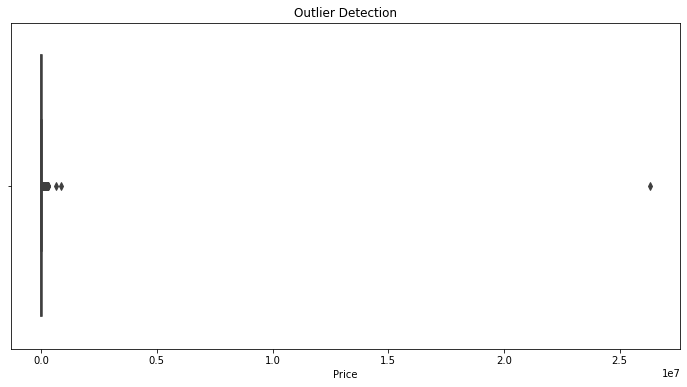

In [47]:
#checking for the outliers
plt.figure(figsize=(12,6))
sns.boxplot(df['Price'])
plt.title('Outlier Detection')

### 2.2.2 Levy-

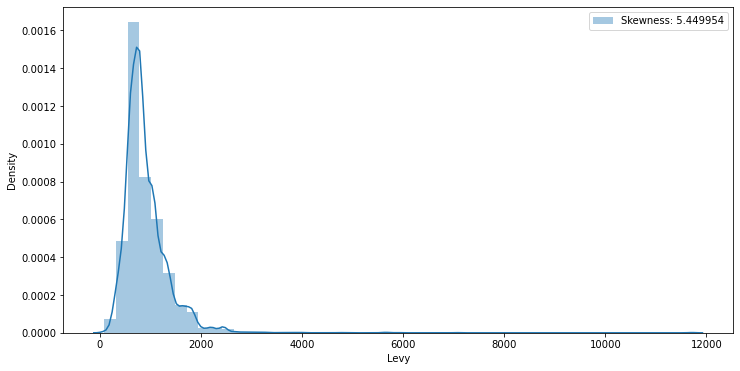

In [48]:
#Distribution of the Levy
plt.figure(figsize=(12,6))
sns.distplot(df['Levy'],label='Skewness: %2f'%(df['Levy'].skew()))
plt.legend(loc='best')

Text(0.5, 1.0, 'Outliers in Levy')

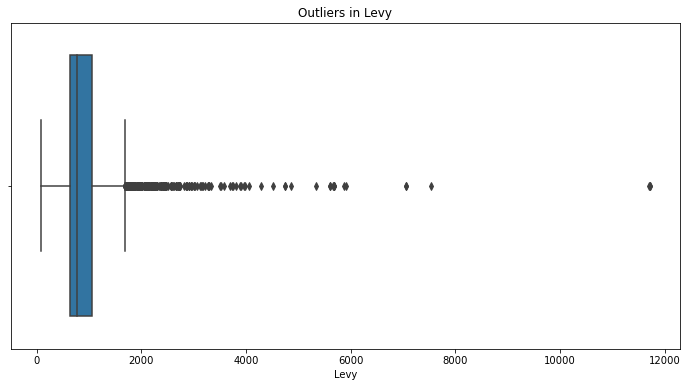

In [49]:
#checking for outliers
plt.figure(figsize=(12,6))
sns.boxplot(df['Levy'])
plt.title("Outliers in Levy")

### 2.2.3 Mileage

In [62]:
#Modifying the Mileage Column
new_mile=df['Mileage'].apply(lambda x: x.split(' ')[0])
df['Mileage']=new_mile

In [78]:
df['Mileage']=df['Mileage'].astype('int')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                19237 non-null  int64   
 1   Price             19237 non-null  int64   
 2   Levy              13418 non-null  float64 
 3   Manufacturer      19237 non-null  category
 4   Model             19237 non-null  category
 5   Prod. year        19237 non-null  int64   
 6   Category          19237 non-null  category
 7   Leather interior  19237 non-null  category
 8   Fuel type         19237 non-null  category
 9   Engine volume     19237 non-null  object  
 10  Mileage           19237 non-null  int32   
 11  Cylinders         19237 non-null  float64 
 12  Gear box type     19237 non-null  category
 13  Drive wheels      19237 non-null  object  
 14  Doors             19237 non-null  object  
 15  Wheel             19237 non-null  category
 16  Color             1923

Text(0.5, 1.0, 'Distribution plot of Mileage')

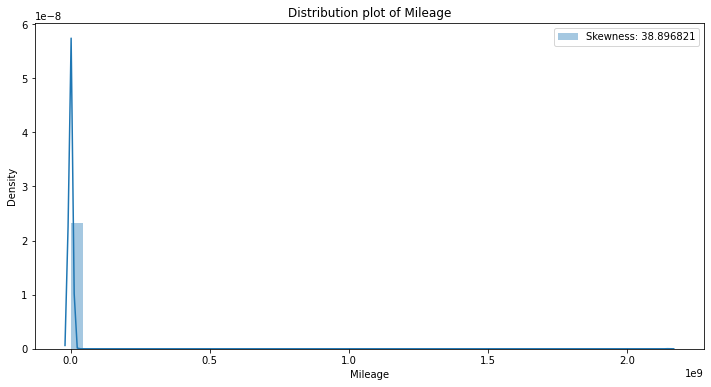

In [81]:
#Distplot of the Mileage
plt.figure(figsize=(12,6))
sns.distplot(df['Mileage'],label='Skewness: %2f'%df['Mileage'].skew())
plt.legend(loc='best')
plt.title('Distribution plot of Mileage')

Text(0.5, 1.0, 'Boxplot of Mileage to detect the outliers')

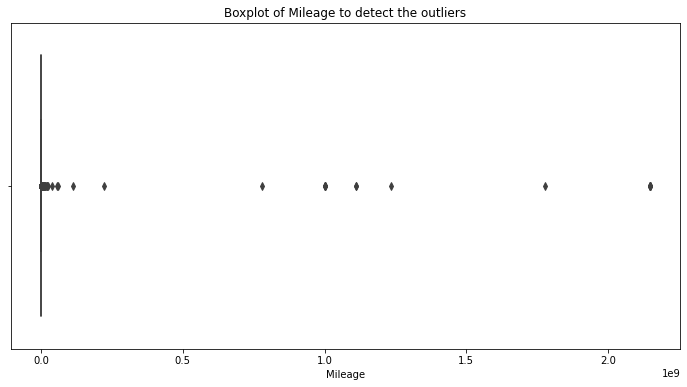

In [82]:
plt.figure(figsize=(12,6))
sns.boxplot(df['Mileage'])
plt.title('Boxplot of Mileage to detect the outliers')

### 2.2.4 Engine Volume - 

In [83]:
#modification in Engine Volume
modified_ev=[float(value.split(' ')[0]) for value in df['Engine volume']]

In [84]:
df['Engine volume']=modified_ev

Text(0.5, 1.0, 'Distribution plot of Engine Volume')

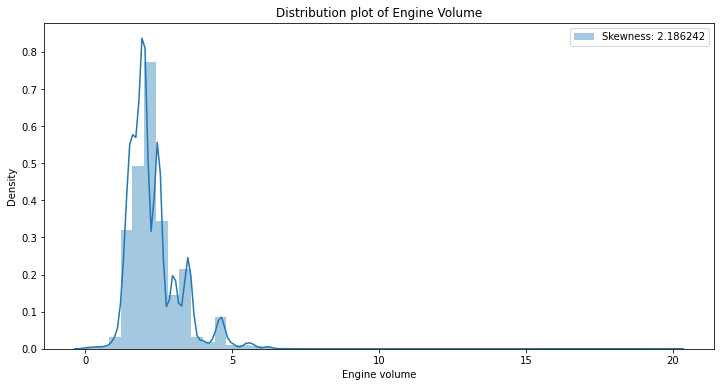

In [85]:
plt.figure(figsize=(12,6))
sns.distplot(df['Engine volume'],label='Skewness: %2f'%df['Engine volume'].skew())
plt.legend(loc='best')
plt.title('Distribution plot of Engine Volume')

<AxesSubplot:xlabel='Engine volume'>

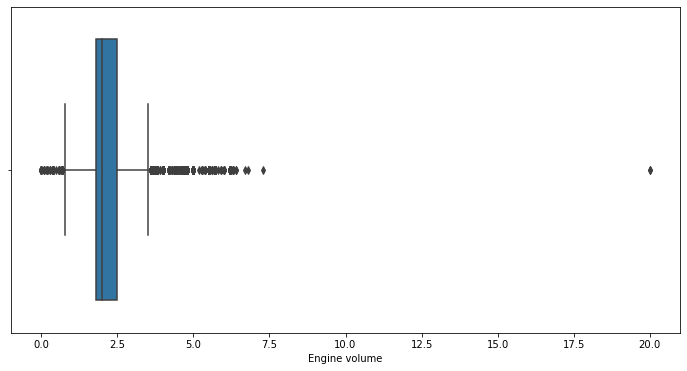

In [86]:
plt.figure(figsize=(12,6))
sns.boxplot(df['Engine volume'])

## 3. Detect Outliers -

We can observe from the above visualization that, most of the numerical feature contains the outliers which needs to be removed.

In [87]:
from collections import Counter

In [88]:
def outliers_detect(dataset,n,feature_list):
    outlier_indices=[]
    for feature in feature_list:
        Q1=np.percentile(df[feature],25)
        Q3=np.percentile(df[feature],75)
        IQR=Q3-Q1
        limits=1.5*IQR
        outliers_index=df[(df[feature]<Q1-limits) | (df[feature]>Q3+limits)].index
        outlier_indices.extend(outliers_index)
    outlier_indices=Counter(outlier_indices)
    #print(outlier_indices)
    multiple_outliers=list(key for key,value in outlier_indices.items() if value > n)
    #print(multiple_outliers)
    return multiple_outliers
    
outliers_to_drop=outliers_detect(df,2,['Price', 'Levy', 'Mileage', 'Cylinders', 'Airbags','Engine volume'])
print('We will drop {} outliers which are'.format(len(outliers_to_drop)),outliers_to_drop)

We will drop 204 outliers which are [90, 211, 420, 483, 573, 579, 723, 724, 747, 1019, 1083, 1128, 1225, 1364, 1459, 1490, 1509, 1510, 1562, 1662, 1704, 1823, 2010, 2054, 2283, 2366, 2726, 2768, 2799, 2859, 2912, 2922, 2941, 2942, 3101, 3365, 3487, 3684, 3686, 3705, 3707, 3765, 3905, 4068, 4183, 4237, 4294, 4351, 4465, 4629, 4649, 4661, 4662, 4705, 4709, 4722, 4919, 5008, 5259, 5412, 5485, 5541, 5718, 5731, 6405, 6468, 6768, 6826, 6873, 6887, 6950, 7010, 7031, 7094, 7147, 7247, 7254, 7283, 7318, 7353, 7565, 7621, 7667, 7675, 7747, 7749, 7760, 7970, 7997, 8036, 8147, 8246, 8541, 8644, 8755, 8880, 9101, 9172, 9212, 9233, 9247, 9259, 9327, 9367, 9405, 9441, 9452, 9688, 9739, 10082, 10085, 10220, 10468, 10520, 10690, 10710, 10714, 10759, 10948, 11035, 11038, 11041, 11131, 11138, 11210, 11529, 11827, 11906, 11941, 11973, 12081, 12152, 12224, 12848, 12905, 12981, 13088, 13320, 13325, 13351, 13467, 13534, 13631, 13653, 13687, 13745, 13847, 13884, 13889, 13941, 13973, 14193, 14356, 14435, 1452

In [89]:
#Outliers
df.iloc[outliers_to_drop,:]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
90,45807330,77775,1604.0,MERCEDES-BENZ,GL 63 AMG,2014,Jeep,Yes,Petrol,5.5,433811,8.0,Automatic,4x4,04-May,Left wheel,Black,10
211,45156280,72130,1885.0,PORSCHE,Panamera,2010,Hatchback,Yes,Petrol,4.8,196800,8.0,Tiptronic,4x4,04-May,Left wheel,White,8
420,45763904,81539,1935.0,LEXUS,GX 460,2016,Jeep,Yes,Petrol,4.6,155976,8.0,Automatic,4x4,04-May,Left wheel,White,0
483,45761340,69935,1646.0,LEXUS,GX 470,2015,Jeep,Yes,Petrol,4.6,273493,8.0,Automatic,4x4,04-May,Left wheel,Silver,0
573,45731517,119172,1301.0,BMW,M6,2014,Coupe,Yes,Petrol,4.4,33500,8.0,Tiptronic,Rear,04-May,Left wheel,White,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7272,45416515,35438,NaN,BMW,X6,2009,Jeep,Yes,Petrol,4.4,960000,8.0,Tiptronic,4x4,04-May,Left wheel,Silver,12
9114,45813297,31988,3015.0,FERRARI,F50,2017,Coupe,Yes,Petrol,6.3,419200,12.0,Automatic,Rear,02-Mar,Left wheel,Silver,12
10973,45416515,35438,NaN,BMW,X6,2009,Jeep,Yes,Petrol,4.4,960000,8.0,Tiptronic,4x4,04-May,Left wheel,Silver,12
13850,45796827,1000,NaN,MERCEDES-BENZ,GLS 63 AMG,2014,Sedan,Yes,Petrol,6.3,748742,1.0,Manual,Front,02-Mar,Left wheel,Black,12


In [90]:
#drop outliers
df=df.drop(outliers_to_drop,axis=0).reset_index(drop=True)

In [91]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19028,45798355,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19029,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19030,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19031,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4


## 4.Handling the missing Values

In [92]:
#Fetching the nan values
#if the value is null then false else true
# ~ mean not equal to
levy_index=list(~df['Levy'].isnull())
levy_index

[True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 Tru

In [93]:
#median is calculated form the record which having true values (i.e. non-null values)
med=np.median(df['Levy'].loc[levy_index])
med

781.0

In [94]:
#fill na
df['Levy']=df['Levy'].fillna(med)

In [95]:
df['Levy'].isnull().sum()

0

In [104]:
df['Mileage']=[np.nan if value==0 else value for value in df['Mileage']]

In [105]:
df['Mileage'].isnull().sum()

718

In [106]:
df['Mileage']=df['Mileage'].fillna(df['Mileage'].mean())

In [108]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

## 5. Feature Engineering -

Feature engineering is the most important part in data preprocessing. Creating new features for the better understanding of the data.
1. Category Feaure based on mean price
2. Fuel Type
3. Gearbox Type
4. No. of Doors
5. Production Years to Age of the car

### 5.1. Category - 

In [109]:
mean_category

,Category,Price
0,Cabriolet,24583.694444
1,Coupe,21250.406015
2,Goods wagon,122916.180258
3,Hatchback,11381.245873
4,Jeep,23684.285949
5,Limousine,11534.454545
6,Microbus,18550.928105
7,Minivan,20531.221020
8,Pickup,28805.269231
9,Sedan,14231.545902


In [110]:
#Differentiated in class based on the mean price of the Category
class1=[]
class2=[]
for i in range(len(mean_category)):
    if mean_category.loc[i,'Price']<20000:
        class1.append(mean_category.loc[i,'Category'])
    else:
        class2.append(mean_category.loc[i,'Category'])
print(class1)
print(class2)

['Hatchback', 'Limousine', 'Microbus', 'Sedan']
['Cabriolet', 'Coupe', 'Goods wagon', 'Jeep', 'Minivan', 'Pickup', 'Universal']


In [111]:
category_data=df['Category']
new_category_data=[]

for value in category_data:
    if value in class1:
        new_category_data.append(1)
    else:
        new_category_data.append(2)

df['Category']=new_category_data

### 5.2 Fuel Type- 

In [112]:
df['Fuel type'].unique()

['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG', 'Hydrogen']
Categories (7, object): ['CNG', 'Diesel', 'Hybrid', 'Hydrogen', 'LPG', 'Petrol', 'Plug-in Hybrid']

In [113]:
fuel_data=df['Fuel type']
other=['Hybrid','Plug-in Hybrid','Hydrogen']
fuel_new_data=[]

for value in fuel_data:
    if value in other:
        fuel_new_data.append('Other')
    else:
        fuel_new_data.append(value)
        
df['Fuel type']=fuel_new_data
df['Fuel type']    

0         Other
1        Petrol
2        Petrol
3         Other
4        Petrol
          ...  
19028       CNG
19029    Petrol
19030    Diesel
19031    Diesel
19032     Other
Name: Fuel type, Length: 19033, dtype: object

In [114]:
df['Fuel type'].unique()

array(['Other', 'Petrol', 'Diesel', 'CNG', 'LPG'], dtype=object)

In [115]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,2,Yes,Other,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,2,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,781.0,HONDA,FIT,2006,1,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,2,Yes,Other,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,1,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4


### 5.3 Gear box Type

In [116]:
df['Gear box type'].unique()

['Automatic', 'Tiptronic', 'Variator', 'Manual']
Categories (4, object): ['Automatic', 'Manual', 'Tiptronic', 'Variator']

In [117]:
gear_box_data=df['Gear box type']
new_gear_box_data=[]

for value in gear_box_data:
    if value in {'Tiptronic','Variator'}:
        new_gear_box_data.append('Other')
    else:
        new_gear_box_data.append(value)
    
df['Gear box type']=new_gear_box_data

In [118]:
df['Gear box type'].unique()

array(['Automatic', 'Other', 'Manual'], dtype=object)

### 5.4 Doors -

In [119]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [120]:
door_data=df['Doors']
new_door_data=[]

for value in door_data:
    if value=='04-May':
        new_door_data.append('4-5')
    elif value=='02-Mar':
        new_door_data.append('2-3')
    else:
        new_door_data.append(value)
set(new_door_data)

{'2-3', '4-5', '>5'}

In [121]:
df['Doors']=new_door_data

In [122]:
df['Doors'].unique()

array(['4-5', '2-3', '>5'], dtype=object)

In [123]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,2,Yes,Other,3.5,186005.0,6.0,Automatic,4x4,4-5,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,2,No,Petrol,3.0,192000.0,6.0,Other,4x4,4-5,Left wheel,Black,8
2,45774419,8467,781.0,HONDA,FIT,2006,1,No,Petrol,1.3,200000.0,4.0,Other,Front,4-5,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,2,Yes,Other,2.5,168966.0,4.0,Automatic,4x4,4-5,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,1,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4-5,Left wheel,Silver,4


### 5.5 Production Year - Age

In [124]:
df['Prod. year'].unique()

array([2010, 2011, 2006, 2014, 2016, 2013, 2007, 1999, 1997, 2018, 2008,
       2012, 2017, 2001, 1995, 2009, 2000, 2019, 2015, 2004, 1998, 1990,
       2005, 2003, 1985, 1996, 2002, 1993, 1992, 1988, 1977, 1989, 1994,
       2020, 1984, 1986, 1991, 1983, 1953, 1964, 1974, 1987, 1943, 1978,
       1976, 1957, 1980, 1939, 1968, 1947, 1982, 1981, 1973], dtype=int64)

In [125]:
prod_data=df['Prod. year']
Age=[]

for value in prod_data:
    Age.append(2022-value)

df["Age"]=Age

In [126]:
df["Age"].unique()

array([12, 11, 16,  8,  6,  9, 15, 23, 25,  4, 14, 10,  5, 21, 27, 13, 22,
        3,  7, 18, 24, 32, 17, 19, 37, 26, 20, 29, 30, 34, 45, 33, 28,  2,
       38, 36, 31, 39, 69, 58, 48, 35, 79, 44, 46, 65, 42, 83, 54, 75, 40,
       41, 49], dtype=int64)

In [127]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,45654403,13328,1399.0,LEXUS,RX 450,2010,2,Yes,Other,3.5,186005.0,6.0,Automatic,4x4,4-5,Left wheel,Silver,12,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,2,No,Petrol,3.0,192000.0,6.0,Other,4x4,4-5,Left wheel,Black,8,11
2,45774419,8467,781.0,HONDA,FIT,2006,1,No,Petrol,1.3,200000.0,4.0,Other,Front,4-5,Right-hand drive,Black,2,16
3,45769185,3607,862.0,FORD,Escape,2011,2,Yes,Other,2.5,168966.0,4.0,Automatic,4x4,4-5,Left wheel,White,0,11
4,45809263,11726,446.0,HONDA,FIT,2014,1,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4-5,Left wheel,Silver,4,8


## Data Transformation -

### 1. Price

In [128]:
from scipy import stats

<AxesSubplot:xlabel='Price', ylabel='Density'>

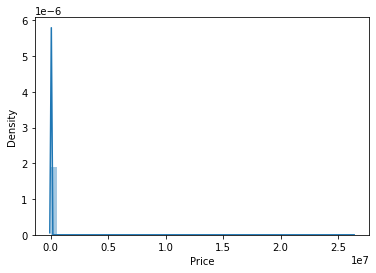

In [129]:
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

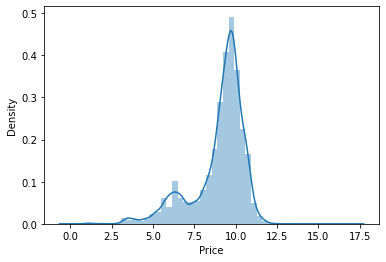

In [130]:
df["Price"]=np.log(df['Price'])

sns.distplot(df['Price'])

### 2. Levy -

<AxesSubplot:xlabel='Levy', ylabel='Density'>

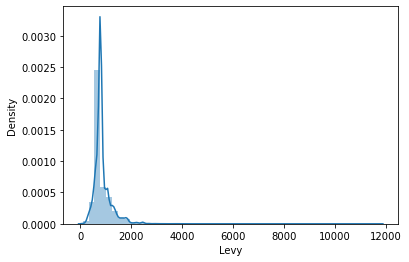

In [131]:
sns.distplot(df['Levy'])

<AxesSubplot:xlabel='Levy', ylabel='Density'>

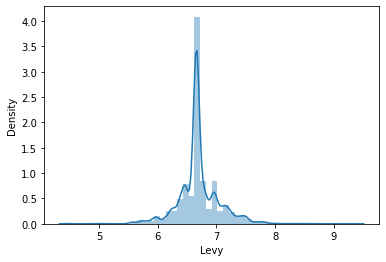

In [132]:
df['Levy']=np.log(df['Levy'])

sns.distplot(df['Levy'])

In [133]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
Age                 0
dtype: int64

### 3. Mileage-

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

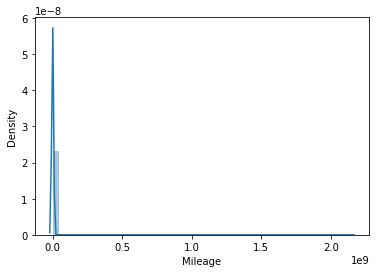

In [134]:
sns.distplot(df['Mileage'])

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

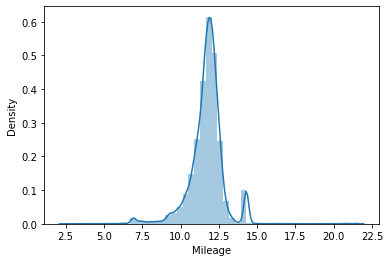

In [135]:
df['Mileage']=np.log(df['Mileage'])

sns.distplot(df['Mileage'])

### 4. Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

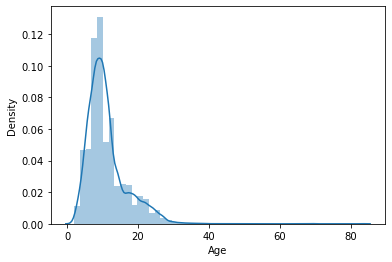

In [136]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

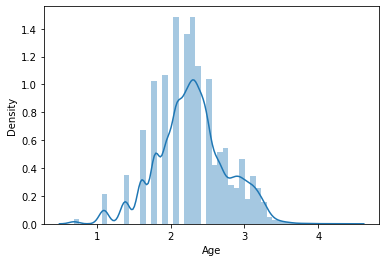

In [137]:
log=np.log(df['Age'])
df['Age']=log
sns.distplot(log)

### 5. Engine Volume-

In [138]:
engine_data=[1 if value ==0 else value for value in df['Engine volume']]

In [139]:
df['Engine volume']=engine_data

In [140]:
df['Engine volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  2.8,  3.2,  3.8,  4.6,  1.2,
        5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  5.5,  5.3,  0.4,  1.1,  2.1,
        0.7,  4.8,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.2,  3.4,  4.3,
        4.2, 20. ,  0.3,  5.9,  5.4,  5.6,  0.6,  4.5,  7.3,  0.1,  6.3,
        3.1,  6.4,  3.9,  6. ,  0.9,  5.2,  5.8])

<AxesSubplot:xlabel='Engine volume', ylabel='Density'>

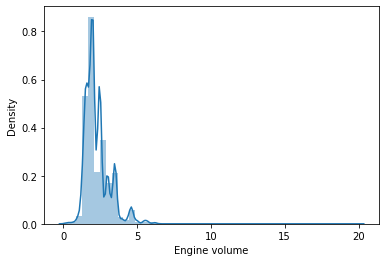

In [141]:
sns.distplot(df['Engine volume'])

In [142]:
df['Engine volume']=np.log(df['Engine volume'])

<AxesSubplot:xlabel='Engine volume', ylabel='Density'>

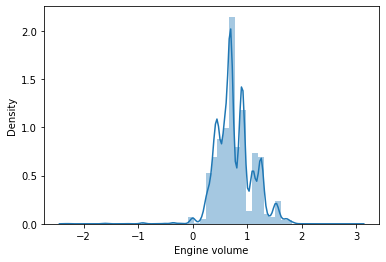

In [143]:
sns.distplot(df['Engine volume'])

## 7.Normalization - 

In [144]:
#Min-Max Scaler 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [145]:
list=['Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Age']

In [146]:
for value in list:
    df[value]=scaler.fit_transform(df[value][:,np.newaxis])   #[:,np.newaxis]= to creat a new dimesion

In [147]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,45654403,9.497622,0.566554,LEXUS,RX 450,2010,2,Yes,Other,0.671033,0.505669,0.333333,Automatic,4x4,4-5,Left wheel,Silver,0.750,0.480920
1,44731507,9.718422,0.501707,CHEVROLET,Equinox,2011,2,No,Petrol,0.641939,0.507345,0.333333,Other,4x4,4-5,Left wheel,Black,0.500,0.457565
2,45774419,9.043932,0.447651,HONDA,FIT,2006,1,No,Petrol,0.484106,0.509503,0.200000,Other,Front,4-5,Right-hand drive,Black,0.125,0.558135
3,45769185,8.190632,0.467779,FORD,Escape,2011,2,Yes,Other,0.607528,0.500592,0.200000,Automatic,4x4,4-5,Left wheel,White,0.000,0.457565
4,45809263,9.369564,0.333374,HONDA,FIT,2014,1,Yes,Petrol,0.484106,0.468409,0.200000,Automatic,Front,4-5,Left wheel,Silver,0.250,0.372090


## 8.Removing the Unwanted Features -  

In [148]:
#Dropped unwanted features
df=df.drop(['ID', 'Manufacturer', 'Model', 'Leather interior', 'Drive wheels', 'Color','Prod. year'],axis=1)

In [149]:
df.head()

,Price,Levy,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Doors,Wheel,Airbags,Age
0,9.497622,0.566554,2,Other,0.671033,0.505669,0.333333,Automatic,4-5,Left wheel,0.750,0.480920
1,9.718422,0.501707,2,Petrol,0.641939,0.507345,0.333333,Other,4-5,Left wheel,0.500,0.457565
2,9.043932,0.447651,1,Petrol,0.484106,0.509503,0.200000,Other,4-5,Right-hand drive,0.125,0.558135
3,8.190632,0.467779,2,Other,0.607528,0.500592,0.200000,Automatic,4-5,Left wheel,0.000,0.457565
4,9.369564,0.333374,1,Petrol,0.484106,0.468409,0.200000,Automatic,4-5,Left wheel,0.250,0.372090


## 9. Feature Selection -

In [150]:
#selected numerical features to find the multicollinearity
for_corr=df[['Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Age']]
for_corr

,Levy,Engine volume,Mileage,Cylinders,Airbags,Age
0,0.566554,0.671033,0.505669,0.333333,0.7500,0.480920
1,0.501707,0.641939,0.507345,0.333333,0.5000,0.457565
2,0.447651,0.484106,0.509503,0.200000,0.1250,0.558135
3,0.467779,0.607528,0.500592,0.200000,0.0000,0.457565
4,0.333374,0.484106,0.468409,0.200000,0.2500,0.372090
...,...,...,...,...,...,...
19028,0.447651,0.565412,0.530930,0.200000,0.3125,0.655542
19029,0.460308,0.599823,0.498236,0.200000,0.5000,0.457565
19030,0.461532,0.565412,0.480882,0.200000,0.2500,0.480920
19031,0.549692,0.565412,0.437555,0.200000,0.2500,0.540813


<AxesSubplot:>

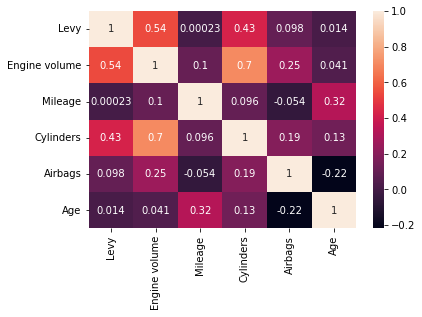

In [151]:
#checking for correlation etween the features
sns.heatmap(for_corr.corr(),annot=True)

As there is no multicolinearity in the above features we will take all these features

In [154]:
#defining the dependent & independent features
x=df.drop('Price',axis=1)
y=df['Price']

## 10. Feature Encoding -

In [155]:
x=pd.get_dummies(x,columns=['Category','Fuel type','Gear box type','Doors','Wheel'])

In [157]:
y.head()

0    9.497622
1    9.718422
2    9.043932
3    8.190632
4    9.369564
Name: Price, dtype: float64

## 11. Model Building -

In [202]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error,r2_score

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)

In [164]:
from collections import OrderedDict

In [165]:
model_rmse=OrderedDict()

In [166]:
model_r2=OrderedDict()

### Linear Regression -

In [167]:
linreg=LinearRegression()

In [168]:
linreg.fit(x_train,y_train)

LinearRegression()

In [185]:
y_pred_lr=linreg.predict(x_test)

In [186]:
mse_lr=round(mean_squared_error(y_test,y_pred_lr),3)
rmse_lr=round(np.sqrt(mse_lr),3)
r2_lr=round(r2_score(y_test,y_pred_lr),3)

model_rmse['Linear Regression']=rmse_lr
model_r2['Linear Regression']=r2_lr

print('RMSE of Linear Regression is {} and r2_score is {}'.format(rmse_lr,r2_lr))

RMSE of Linear Regression is 1.429 and r2_score is 0.185


## Support Vector Machine -

In [179]:
svm=SVR()

In [180]:
svm.fit(x_train,y_train)

SVR()

In [187]:
y_pred_svm=svm.predict(x_test)

In [199]:
mse_svm=round(mean_squared_error(y_test,y_pred_svm),3)
rmse_svm=round(np.sqrt(mse_svm),3)
r2_svm=round(r2_score(y_test,y_pred_svm),3)

model_rmse['Support Vector Regressor']=rmse_svm
model_r2['Support Vector Regressor']=r2_svm

print('RMSE of Support Vector Regression is {} and r2_score is {}'.format(rmse_svm,r2_svm))

RMSE of Support Vector Regression is 1.317 and r2_score is 0.307


## Decision Tree Regressor -

In [194]:
dtr=DecisionTreeRegressor()

In [195]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [196]:
y_pred_dtr=dtr.predict(x_test)

In [198]:
mse_dtr=round(mean_squared_error(y_test,y_pred_dtr),3)
rmse_dtr=round(np.sqrt(mse_dtr),3)
r2_dtr=round(r2_score(y_test,y_pred_dtr),3)

model_rmse['Decision Tree Regressor']=rmse_dtr
model_r2['Decision Tree Regressor']=r2_dtr

print('RMSE of Decision Tree Regression is {} and r2_score is {}'.format(rmse_dtr,r2_dtr))

RMSE of Decision Tree Regression is 1.346 and r2_score is 0.277


## Random Forest Regressor - (10 Trees)

In [222]:
tree_numbers=[10,30,50,100,1000]
rmse_score=[]
r2_sc=[]
for i in tree_numbers:
    rfr=RandomForestRegressor(n_estimators=i)
    rfr.fit(x_train,y_train)
    y_pred=rfr.predict(x_test)
    mse=round(mean_squared_error(y_test,y_pred),3)
    rmse=round(np.sqrt(mse),3)
    r2=round(r2_score(y_test,y_pred),3)
    
    rmse_score.append(rmse)
    r2_sc.append(r2)
    print('RMSE of Decision Tree Regression with n_estimator {} is {} and r2_score is {}'.format(i,rmse,r2))
print(rmse_score)
print(r2_sc)

RMSE of Decision Tree Regression with n_estimator 10 is 1.071 and r2_score is 0.542
RMSE of Decision Tree Regression with n_estimator 30 is 1.023 and r2_score is 0.582
RMSE of Decision Tree Regression with n_estimator 50 is 1.023 and r2_score is 0.582
RMSE of Decision Tree Regression with n_estimator 100 is 1.016 and r2_score is 0.587
RMSE of Decision Tree Regression with n_estimator 1000 is 1.014 and r2_score is 0.589
[1.071, 1.023, 1.023, 1.016, 1.014]
[0.542, 0.582, 0.582, 0.587, 0.589]


In [224]:
model_rmse

OrderedDict([('Linear Regression', 1.429),
             ('Support Vector Regressor', 1.317),
             ('Decision Tree Regressor', 1.346),
             ('Random Forest with 10 Trees', 1.014)])

In [225]:
model_r2

OrderedDict([('Linear Regression', 0.185),
             ('Support Vector Regressor', 0.307),
             ('Decision Tree Regressor', 0.277),
             ('Random Forest with 10 Trees', 0.59)])

### Conclusion - 
From the above resut we can observe that the Random Forest with 1000 Trees has least RMSE of 1.014 & high R2 score 0.589